In [1]:
from sys import path
import yaml
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver

path.append("../src/")

from utils import format_messages
from subagents.research_lead_agent import ResearchLeadAgent

# compilation config
checkpointer = InMemorySaver()
compile_config = {'checkpointer': checkpointer}

# llm config
llm_config = yaml.safe_load(open("../config/llm.yaml", "rb"))

# app
app = ResearchLeadAgent(
    llm_config=llm_config,
    compile_config=compile_config
)

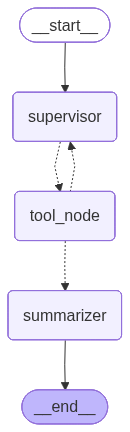

In [2]:
from IPython.display import Image, display

display(Image(app.compiled_graph.get_graph(xray=True).draw_mermaid_png()))

In [3]:
# Run the agent
from utils import format_messages
from langchain_core.messages import HumanMessage

# Example brief
research_brief = """I want to identify and evaluate the coffee shops in San Francisco that are considered the best based specifically  
on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco area, 
using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,      
expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,      
location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary    
sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like     
Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where direct  
customer feedback about coffee quality can be found. The study should result in a well-supported list or ranking of
the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data as  
of July 2025."""

config = {"configurable": {"thread_id": "scoping-session-1", "recursion_limit": 50}}
result = await app.ainvoke(
    {"messages": [
        HumanMessage(content=f"{research_brief}.")
    ]},
    config=config
)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to identify and evaluate the coffee shops in San Francisco that are considered the best based            │
│ specifically                                                                                                    │
│ on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco    │
│ area,                                                                                                           │
│ using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,   │
│ expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,   │
│ location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary │
│ sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like  │
│ Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where      │
│ direct                                                                                                          │
│ customer feedback about coffee quality can be found. The study should result in a well-supported list or        │
│ ranking of                                                                                                      │
│ the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data  │
│ as                                                                                                              │
│ of July 2025..                                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "The research question is clear: identify and evaluate the best coffee shops in San Francisco   │
│ based on coffee quality. I need to gather information from primary sources, focusing on expert reviews,         │
│ customer ratings, and specialty coffee certifications. Given the emphasis on coffee quality, I can break down   │
│ the research into three main areas: 1) Expert reviews from reputable coffee organizations, 2) Customer ratings  │
│ from review aggregators, and 3) Specialty coffee certifications. I will conduct parallel research to            │
│ efficiently gather data from these three areas."                                                                │
│ }                                                                                                               │
│    ID: call_PqY5Dqc6uAGveZS1IwCJzKhD                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: The research question is clear: identify and evaluate the best coffee shops in San         │
│ Francisco based on coffee quality. I need to gather information from primary sources, focusing on expert        │
│ reviews, customer ratings, and specialty coffee certifications. Given the emphasis on coffee quality, I can     │
│ break down the research into three main areas: 1) Expert reviews from reputable coffee organizations, 2)        │
│ Customer ratings from review aggregators, and 3) Specialty coffee certifications. I will conduct parallel       │
│ research to efficiently gather data from these three areas.                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: ConductResearch                                                                                   │
│    Args: {                                                                                                      │
│   "research_topic": "Identify and evaluate the best coffee shops in San Francisco based on expert reviews from  │
│ reputable coffee organizations, focusing on coffee quality."                                                    │
│ }                                                                                                               │
│    ID: call_uzJC1Y069fHqu3oOTK8sZrMA                                                                            │
│                                                                                                                 │
│ 🔧 Tool Call: ConductResearch                                                                                   │
│    Args: {                                                                                                      │
│   "research_topic": "Gather customer ratings and reviews from prominent review aggregators like Google and Yelp │
│ for coffee shops in San Francisco, emphasizing coffee quality."                                                 │
│ }                                                                                                               │
│    ID: call_zYf3o6n5x6RhvE2we4LC5ATA                                                                            │
│                                                                                                                 │
│ 🔧 Tool Call: ConductResearch                                                                                   │
│    Args: {                                                                                                      │
│   "research_topic": "Research specialty coffee certifications for coffee shops in San Francisco and how these   │
│ certifications relate to coffee quality."                                                                       │
│ }                                                                                                               │
│    ID: call_rlOi9UoXQ5rP8HsgzTUj6JZA                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ **List of Queries and Tool Calls Made**                                                                         │
│ 1. Search for the best coffee shops in San Francisco based on expert reviews focusing on coffee quality.        │
│ 2. Search for San Francisco coffee ratings and reviews.                                                         │
│ 3. Search for top coffee shops in San Francisco with a focus on coffee quality and expert reviews.              │
│                                                                                                                 │
│ **Fully Comprehensive Findings**                                                                                │
│                                                                                                                 │
│ 1. **Blue Bottle Coffee**:                                                                                      │
│    - Known for its single-origin beans and picturesque location at the Ferry Building, perfect for coffee with  │
│ a view. It is considered one of the most knowledgeable and skillful coffee roasters in the third wave coffee    │
│ game.                                                                                                           │
│                                                                                                                 │
│ 2. **Andytown Coffee Roasters**:                                                                                │
│    - Praised for its popular Snowy Plover coffee float, a refreshing coffee drink made with espresso,           │
│ Pellegrino, and delicious homemade whipped cream.                                                               │
│                                                                                                                 │
│ 3. **Four Barrel Coffee**:                                                                                      │
│    - Stands out for its locally sourced beans and visible roasting process. The baristas are friendly,          │
│ efficient, and consistent, making it a favorite among coffee enthusiasts.                                       │
│                                                                                                                 │
│ 4. **Sightglass Coffee**:                                                                                       │
│    - Known for its unique affogato bar and a dramatic multi-leveled space. It features seasonal Salt & Straw    │
│ ice cream, enhancing the coffee experience.                                                                     │
│                                                                                                                 │
│ 5. **Wrecking Ball Coffee Roasters**:                                                                           │
│    - Credited with the term 'third-wave coffee,' focusing on high-quality brewing techniques and a minimalist   │
│ space.                                                                                                          │
│                                                                                                                 │
│ 6. **Ritual Coffee Roasters**:                                                                                  │
│    - Recognized for its direct trade practices and high-quality beans, Ritual is a favorite among coffee        │
│ aficionados, emphasizing relationships with farmers to ensure quality.                                          │
│                                                                                                                 │
│ 7. **The Coffee Movement**:                                                                                     │
│    - Offers inventive drinks in underserved areas and i

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ **List of Queries and Tool Calls Made**                                                                         │
│ 1. Search for customer ratings and reviews from Google and Yelp for coffee shops in San Francisco, emphasizing  │
│ coffee quality.                                                                                                 │
│ 2. Search for the best coffee shops in San Francisco with ratings and reviews.                                  │
│ 3. Search for customer reviews of coffee shops in San Francisco focusing on coffee quality.                     │
│ 4. Search for top-rated coffee shops in San Francisco with reviews.                                             │
│                                                                                                                 │
│ **Fully Comprehensive Findings**                                                                                │
│                                                                                                                 │
│ 1. **Q Specialty Coffee**                                                                                       │
│    - **Rating**: 4.5 stars (61 reviews)                                                                         │
│    - **Location**: 3490 California St, Ste A, San Francisco, CA 94118                                           │
│    - **Summary**: Known for its high-quality coffee and friendly service. Customers appreciate the unique       │
│ flavors and the cozy atmosphere.                                                                                │
│                                                                                                                 │
│ 2. **Paper Son Coffee**                                                                                         │
│    - **Rating**: 4.5 stars (72 reviews)                                                                         │
│    - **Location**: San Francisco, CA                                                                            │
│    - **Summary**: Offers a great selection of coffee with a focus on quality.                                   │
│                                                                                                                 │
│ 3. **The Coffee Movement**                                                                                      │
│    - **Rating**: 4.6 stars (713 reviews)                                                                        │
│    - **Location**: San Francisco, CA                                                                            │
│    - **Summary**: Known for its innovative coffee offerings and a great location near the Cable Car Museum.     │
│ Customers appreciate the quality and the unique experience.                                                     │
│                                                                                                                 │
│ 4. **Sightglass Coffee**                                                                                        │
│    - **Rating**: 4.0 stars (2.2k reviews)                                                                       │
│    - **Location**: 270 Seventh St, San Francisco, CA 94103                                                      │
│    - **Summary**: Praised for its meticulously sourced and roasted coffee. Customers rave about the cold brew   │
│ and the inviting ambiance, making it a popular spot for both coffee enthusiasts and remote workers.             │
│                                                                                                                 │
│ 5. **Ritual Coffee Roasters**                                                                                   │
│    - **Rating**: 4.5 stars                             

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ ### List of Queries and Tool Calls Made                                                                         │
│ 1. Specialty coffee certifications San Francisco coffee shops quality                                           │
│ 2. Specialty Coffee Association certifications coffee quality impact                                            │
│ 3. San Francisco coffee shops with Specialty Coffee Association certifications                                  │
│ 4. Q Specialty Coffee Sightglass Coffee certifications San Francisco                                            │
│                                                                                                                 │
│ ### Fully Comprehensive Findings                                                                                │
│                                                                                                                 │
│ In San Francisco, the specialty coffee scene is vibrant and competitive, with several coffee shops emphasizing  │
│ quality through recognized certifications. The **Specialty Coffee Association (SCA)** plays a crucial role in   │
│ this landscape by providing various certifications that enhance coffee quality and professional standards.      │
│                                                                                                                 │
│ #### Key Certifications                                                                                         │
│                                                                                                                 │
│ 1. **Q Grader Certification**: This is one of the most recognized certifications in the coffee industry,        │
│ allowing individuals to assess coffee quality based on a standardized scoring system. Q Graders are trained to  │
│ evaluate coffee on various attributes, including flavor, aroma, and acidity. This certification is essential    │
│ for ensuring that coffee shops maintain high standards in their offerings.                                      │
│                                                                                                                 │
│ 2. **Coffee Value Assessment (CVA)**: Recently introduced by the SCA, the CVA aims to modernize coffee          │
│ evaluation methods by incorporating multiple assessment stages. This comprehensive approach helps coffee        │
│ professionals evaluate quality more fairly and thoroughly, considering both intrinsic and extrinsic factors.    │
│                                                                                                                 │
│ #### Notable Coffee Shops in San Francisco                                                                      │
│                                                                                                                 │
│ 1. **Q Specialty Coffee**: Founded by Cyrus Shen, who holds coffee grading certifications, this café emphasizes │
│ unique brews and detailed origin stories of its coffee beans. Q Specialty Coffee is certified by a licensed     │
│ Q-grader and focuses on high-quality, flavorful coffee through in-house roasting. Their menu features seasonal  │
│ pour-overs and innovative drinks, showcasing their commitment to quality. The café aims to elevate the local    │
│ coffee scene with a menu designed for coffee enthusiasts, including seasonal pourovers and nitro cold brews     │
│ infused with fruit.                                                                                             │
│                                                                                                                 │
│ 2. **Sightglass Coffee**: While specific certification details were not found, Sightglass is known for its      │
│ high-quality coffee and has a strong reputation in the 

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "I have gathered comprehensive information on the best coffee shops in San Francisco based on   │
│ coffee quality. The findings include expert reviews, customer ratings, and details on specialty coffee          │
│ certifications. Key coffee shops identified include Blue Bottle Coffee, Andytown Coffee Roasters, and Q         │
│ Specialty Coffee, among others. Customer ratings from platforms like Yelp and Google reinforce the quality of   │
│ these shops, with many receiving high ratings. Additionally, the research on specialty coffee certifications    │
│ highlights the importance of quality assessment in the coffee industry. \n\nHowever, I need to synthesize this  │
│ information into a cohesive ranking or list that emphasizes coffee quality. I should also ensure that the       │
│ sources are properly cited for credibility. I have enough information to create a well-supported list, so I     │
│ will proceed to finalize the research."                                                                         │
│ }                                                                                                               │
│    ID: call_hboOWJ4ep6XRQ3TAEmht8lGY                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: I have gathered comprehensive information on the best coffee shops in San Francisco based  │
│ on coffee quality. The findings include expert reviews, customer ratings, and details on specialty coffee       │
│ certifications. Key coffee shops identified include Blue Bottle Coffee, Andytown Coffee Roasters, and Q         │
│ Specialty Coffee, among others. Customer ratings from platforms like Yelp and Google reinforce the quality of   │
│ these shops, with many receiving high ratings. Additionally, the research on specialty coffee certifications    │
│ highlights the importance of quality assessment in the coffee industry.                                         │
│                                                                                                                 │
│ However, I need to synthesize this information into a cohesive ranking or list that emphasizes coffee quality.  │
│ I should also ensure that the sources are properly cited for credibility. I have enough information to create a │
│ well-supported list, so I will proceed to finalize the research.                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: ResearchComplete                                                                                  │
│    Args: {}                                                                                                     │
│    ID: call_poQqk3xbRZWD25VlEsLANBza                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ **List of Queries and Tool Calls Made**                                                                         │
│ 1. Search for the best coffee shops in San Francisco based on expert reviews focusing on coffee quality.        │
│ 2. Search for San Francisco coffee ratings and reviews.                                                         │
│ 3. Search for top coffee shops in San Francisco with a focus on coffee quality and expert reviews.              │
│ 4. Search for customer ratings and reviews from Google and Yelp for coffee shops in San Francisco, emphasizing  │
│ coffee quality.                                                                                                 │
│ 5. Search for the best coffee shops in San Francisco with ratings and reviews.                                  │
│ 6. Search for customer reviews of coffee shops in San Francisco focusing on coffee quality.                     │
│ 7. Search for top-rated coffee shops in San Francisco with reviews.                                             │
│ 8. Specialty coffee certifications San Francisco coffee shops quality.                                          │
│ 9. Specialty Coffee Association certifications coffee quality impact.                                           │
│ 10. San Francisco coffee shops with Specialty Coffee Association certifications.                                │
│ 11. Q Specialty Coffee Sightglass Coffee certifications San Francisco.                                          │
│                                                                                                                 │
│ **Fully Comprehensive Findings**                                                                                │
│                                                                                                                 │
│ 1. **Blue Bottle Coffee**:                                                                                      │
│    - Known for its single-origin beans and picturesque location at the Ferry Building, perfect for coffee with  │
│ a view. It is considered one of the most knowledgeable and skillful coffee roasters in the third wave coffee    │
│ game.                                                                                                           │
│                                                                                                                 │
│ 2. **Andytown Coffee Roasters**:                                                                                │
│    - Praised for its popular Snowy Plover coffee float, a refreshing coffee drink made with espresso,           │
│ Pellegrino, and delicious homemade whipped cream.                                                               │
│                                                                                                                 │
│ 3. **Four Barrel Coffee**:                                                                                      │
│    - Stands out for its locally sourced beans and visible roasting process. The baristas are friendly,          │
│ efficient, and consistent, making it a favorite among coffee enthusiasts.                                       │
│                                                                                                                 │
│ 4. **Sightglass Coffee**:                                                                                       │
│    - Known for its unique affogato bar and a dramatic multi-leveled space. It features seasonal Salt & Straw    │
│ ice cream, enhancing the coffee experience. Sightglass is known for its high-quality coffee and has a strong    │
│ reputation in the specialty coffee community. They focus on sourcing and roasting beans that meet high          │
│ standards, aligning with the principles of specialty co